In [1]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from utils import read_lastfm, build_vocab, get_embeddings, load_model

%load_ext autoreload
%autoreload 2

In [6]:
LOAD_MODEL = False

In [7]:
if not LOAD_MODEL:
    songs, users = read_lastfm("data/lastfm-dataset-1K.zip")
    songs.head()

In [5]:
if LOAD_MODEL:
    emb_vectors, model = load_model("data/word2vec/word2vec.model")
else:
    sample, emb_vectors, model = get_embeddings(songs)
#     model.save("data/word2vec/word2vec.model")

Number of entries: 19098850
Number of song embeddings: 527552


In [6]:
def plot_embeddings_2D(emb_vectors, song_artists, top_n):
    # apply PCA
    sg_df = pd.DataFrame(emb_vectors).T
    pca = PCA(n_components=2)
    components = pca.fit_transform(sg_df)
    x, y = components[0], components[1]

    fig, ax = plt.subplots(figsize=(15, 8))
    plot_df = pd.DataFrame(data=components)
    plot_df['top_artist'] = song_artists
    plot_df = plot_df.query("top_artist != 'others'")
    sns.scatterplot(data=plot_df, x=0, y=1, hue="top_artist")
    plt.xlabel('PCA first dimension')
    plt.ylabel('PCA second dimension')
    plt.title(f"Skipgram embeddings PCA 2D visualization for top {top_n} artists")
    plt.show()
    
def plot_top_artist(df, emb_vectors, top_n=10):
    top_artists = list(df[df.song_id.isin(emb_vectors.keys())].artist_name.value_counts()\
        .to_frame().head(top_n).index.codes)
    df["top_artist"] = 'others'
    for i, artist in enumerate(top_artists):
        df.top_artist.where(df.artist_name.cat.codes != artist, df.artist_name, inplace=True)
        
    min_count_df = pd.DataFrame(data=emb_vectors.keys(), columns=["song_id"])
    song_artists = pd.merge(min_count_df, df[['song_id', 'top_artist']].drop_duplicates(), how='left')\
                            .top_artist.values

    plot_embeddings_2D(emb_vectors, song_artists, top_n)

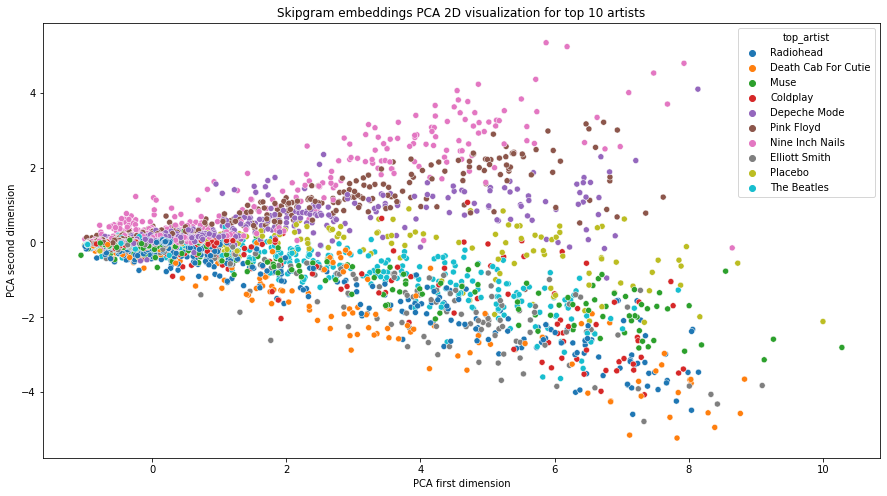

In [7]:
plot_top_artist(sample, emb_vectors)

In [8]:
# song_tags_top1.to_csv("song_tags_top1.csv", index=False)
song_tags_top1 = pd.read_csv("data/song_tags_top1.csv")

In [9]:
song_tags_top1.head()

artist_name               track_name  \
0         Boy Division  Love Will Tear Us Apart   
1  Death Cab For Cutie          Soul Meets Body   
2            The Knife               Heartbeats   
3                 Muse                Starlight   
4          The Killers      When You Were Young   

                                                tags             tag_1  
0  [{'count': 100, 'name': 'rock', 'url': 'https:...      joy division  
1  [{'count': 100, 'name': 'indie', 'url': 'https...             indie  
2  [{'count': 100, 'name': 'electronic', 'url': '...        electronic  
3  [{'count': 100, 'name': 'alternative rock', 'u...  alternative rock  
4  [{'count': 100, 'name': 'rock', 'url': 'https:...              rock

In [11]:
sample_with_tags = sample.merge(song_tags_top1, how='left')

In [12]:
sample_with_tags.head()

user_id                 timestamp  \
0  user_000391 2005-02-14 00:00:07+00:00   
1  user_000871 2005-02-14 00:00:38+00:00   
2  user_000709 2005-02-14 00:01:44+00:00   
3  user_000285 2005-02-14 00:02:10+00:00   
4  user_000142 2005-02-14 00:02:40+00:00   

                              artist_id   artist_name  \
0  fbd86487-ccb5-4a57-a860-cc3d360b5115    Starsailor   
1  b3a6ebdf-4ee6-4ec0-912c-be03ade6c833   Sui Generis   
2  b4d32cff-f19e-455f-86c4-f347d824ca61    Eurythmics   
3  95e1ead9-4d31-4808-a7ac-32c3614c116b   The Killers   
4  51086134-0896-4c00-b54a-c5c37aeaf2bf  Anton Maiden   

                               track_id                  track_name  \
0  6b4977f4-3c7a-492a-af61-1e877fa66f52                Love Is Here   
1  9ecc2ab3-7294-43ad-bdeb-f51388a7a6e0         Rasguña Las Piedras   
2  1d0f1ea5-0a92-4578-a7e7-3f2a7129da61          Love Is A Stranger   
3  46909ba9-46c7-461e-a2ef-280eacd550e4  Jenny Was A Friend Of Mine   
4  14025355-94c2-4e9b-b63f-c16cab9e8086                 Revelations   

       song_id top_artist                                               tags  \
0   4115113004     others  [{'count': 100, 'name': 'indie', 'url': 'https...   
1  80909156645     others  [{'count': 100, 'name': 'sui generis', 'url': ...   
2   1559230142     others  [{'count': 100, 'name': '80s', 'url': 'https:/...   
3   4531122533     others  [{'count': 100, 'name': 'rock', 'url': 'https:...   
4   5527952383     others                                                NaN   

         tag_1  
0        indie  
1  sui generis  
2          80s  
3         rock  
4          NaN

In [46]:
def plot_tag_embeddings_2D(emb_vectors, song_tags, top_n):
    # apply PCA
    sg_df = pd.DataFrame(emb_vectors).T
    pca = PCA(n_components=2)
    components = pca.fit_transform(sg_df)
    x, y = components[0], components[1]

    fig, ax = plt.subplots(figsize=(15, 8))
    plot_df = pd.DataFrame(data=components)
    plot_df['top_tag'] = song_tags
    plot_df = plot_df.query("top_tag != 'others'")
    sns.scatterplot(data=plot_df, x=0, y=1, hue="top_tag")
    plt.xlabel('PCA first dimension')
    plt.ylabel('PCA second dimension')
    plt.title(f"Skipgram embeddings PCA 2D visualization for top {top_n} tags")
    plt.show()
    
def plot_top_tags(df, emb_vectors, top_n=10):
    top_tags = list(df[df.song_id.isin(emb_vectors.keys())].tag_1.value_counts()\
        .to_frame().head(top_n).index)
    df["top_tag"] = 'others'
    for i, tag in enumerate(top_tags):
        df.top_tag.where(df.tag_1 != tag, df.tag_1, inplace=True)
        
    min_count_df = pd.DataFrame(data=emb_vectors.keys(), columns=["song_id"])
    song_tags = pd.merge(min_count_df, df[['song_id', 'top_tag']].drop_duplicates(), how='left')\
                            .top_tag.values

    plot_tag_embeddings_2D(emb_vectors, song_tags, top_n)

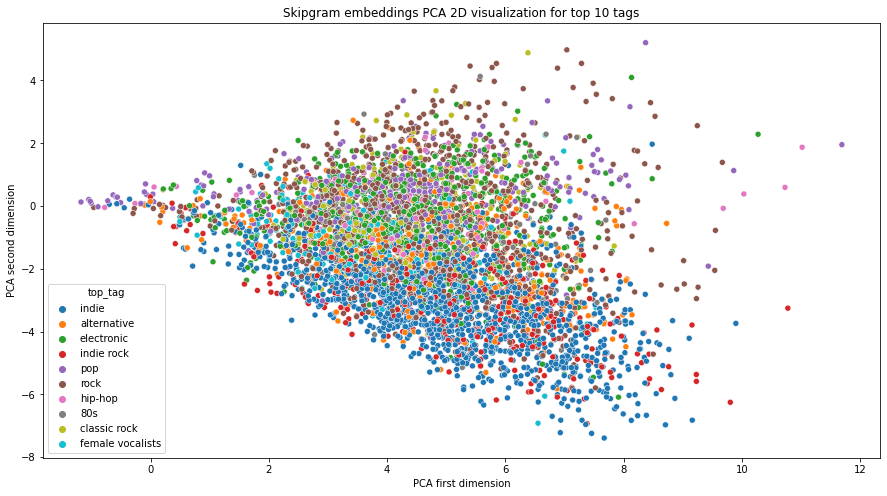

In [43]:
plot_top_tags(sample_with_tags, emb_vectors, n_points=5000)

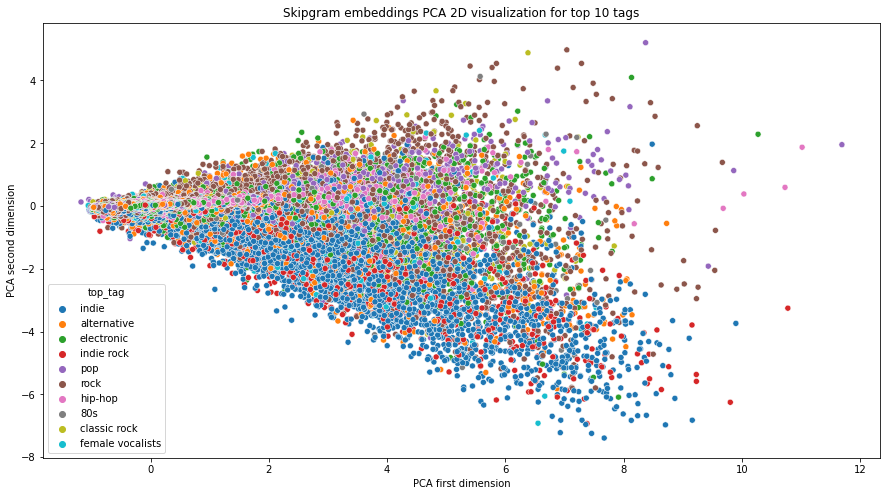

In [47]:
plot_top_tags(sample_with_tags, emb_vectors)

# Plotly

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA

In [17]:
def add_song_ids(df):
    # order listening history and discard negligible number of tracks that have no name
    df = df.sort_values("timestamp")
    df = df[~df.track_name.isna()]
    
    # create a unique song id for each unique track and artist name combination
    df["song_id"]= df.artist_name.cat.codes.astype("int64") * df.track_name.nunique() \
                        + df.track_name.cat.codes
    assert len(df.query("song_id < 0")) == 0 #Check underflow
    
    # create and retrun the "document" (a list of "sentences")
    return df

#### By number of song listens

In [19]:
# apply PCA
sg_df = pd.DataFrame(emb_vectors).T
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(sg_df))
components.columns = [str(i) for i in components.columns]

count_df = pd.DataFrame(add_song_ids(sample).groupby(['song_id'])['song_id'].count())
count_df.columns = ['song_count']
sg_df = (sg_df
         .reset_index()
         .merge(add_song_ids(sample)[['artist_name', 'track_name', 'song_id']
                             ].drop_duplicates(['song_id']), how='left', right_on='song_id', left_on='index')
         .drop(['index'], axis=1)
         .merge(count_df, left_on='song_id', right_index=True, how='left')
         .sort_values(by='song_count', ascending=False))

In [20]:
points_to_display = 100   # 1000 songs takes approx 2m30s

# plot the vectors
fig = px.scatter(components[:points_to_display], x='0', y='1', color=sg_df.artist_name[:points_to_display], 
                 title='Embeddings 2D visualization',
                 hover_data = {'0': False, 
                               '1': False,
                               'Track': sg_df.track_name[:points_to_display],
                               'Count': sg_df.song_count[:points_to_display]}
                )

# make the figure more readable
fig.update_layout(showlegend=False)
for data in fig.data:
    template = (data.hovertemplate.replace("color=", "<b>Artist:</b> ")
                                  .replace("Track=", "<b>Track:</b> ")
                                  .replace("Count=", "<b>Total listens in dataset:</b> "))
    data.hovertemplate = template

fig.show()

#### By top artists

In [24]:
artists_to_display = 10
top_artists = (sample
               .groupby('artist_name').count()['track_name']
               .sort_values(ascending=False)).index[:artists_to_display]

# apply PCA
sg_df = pd.DataFrame(emb_vectors).T
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(sg_df))
components.columns = [str(i) for i in components.columns]

count_df = pd.DataFrame(add_song_ids(sample).groupby(['song_id'])['song_id'].count())
count_df.columns = ['song_count']
sg_df = (sg_df
         .reset_index()
         .merge(add_song_ids(sample)[['artist_name', 'track_name', 'song_id']
                             ].drop_duplicates(['song_id']), how='left', right_on='song_id', left_on='index')
         .drop(['index'], axis=1)
         .merge(count_df, left_on='song_id', right_index=True, how='left')
         .sort_values(by='song_count', ascending=False))

In [25]:
top_artists_index = sg_df['artist_name'].isin(top_artists)
components = components[top_artists_index.values]
sg_df = sg_df[top_artists_index]

# plot the vectors
fig = px.scatter(components, x='0', y='1', color=sg_df.artist_name, 
                 title='Embeddings 2D visualization',
                 hover_data = {'0': False, 
                               '1': False,
                               'Track': sg_df.track_name,
                               'Count': sg_df.song_count}
                )

# make the figure more readable
for data in fig.data:
    template = (data.hovertemplate.replace("color=", "<b>Artist:</b> ")
                                  .replace("Track=", "<b>Track:</b> ")
                                  .replace("Count=", "<b>Total listens in dataset:</b> "))
    data.hovertemplate = template

fig.show()